## Sequential MNIST with RNNs
In This section we are going to classify MNIST dataset sequentially using RNNs.
IMAGE

**0. In the first cell, all required packages and functions/classes are imported.**

In [2]:
# import what you need
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input, SimpleRNN, LSTM, GRU
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model

Using TensorFlow backend.


**1. Preparing data:**
In this cell, following steps should be taken: 
* Load Train and Test data (use mnist.load_data())
* normalize data by deviding by its max (use numpy max function)
* change representation of label data to one-hot (use keras.utils.to_categorical)
* print the shape of all data arrays.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(np.max(x_train))
x_train = x_train/255
x_test = x_test/255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print('train data dim:', x_train.shape)
print('test data dim:', x_test.shape)

255
train data dim: (60000, 28, 28)
test data dim: (10000, 28, 28)


**2. Define Model**
* (2.1) Determine number of hidden units(nb_units) for the RNN cell, sequence length, and feature size.
* (2.2) We are going to create a Sequential model.
* (2.3) Add a SimpleRNN layer to the model. (giving nb_units as the argument and input shape to the cell is enough).
* (2.4) We should map the output of RNN cell (with size of nb_units) to our 10 class using a Dense layer. 
* (2.5) Use categorical_crossentropy as your loss and adam as your optimizer. You may add your desired metrics (accuracy is suggested).


In [4]:
# 2.1 Determine the following variables:
nb_units = 50
seq_length = 28
feature_size = 28
# 2.2 Define a Sequential model. 
model = Sequential()
# 2.3 Add a SimpleRNN layer (search the documenation for its parameters)
model.add(SimpleRNN(nb_units, input_shape=(seq_length, feature_size)))
# 2.4 Add a Dense layer (search the documenation for its parameters)
model.add(Dense(units=10, activation='softmax'))
# 2.5 Compile the model.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 2.6 Print out model.summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                3950      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 4,460
Trainable params: 4,460
Non-trainable params: 0
_________________________________________________________________


**3. Training**
Simply Train the model using model.fit (check its parameter in keras documentation).

In [5]:
epochs = 3
# Complete following line, using  batch_size=128 is suggested.
history = model.fit(x_train, y_train, batch_size=32,epochs=10,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.6426 - acc: 0.7979
Epoch 2/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.3250 - acc: 0.9041
Epoch 3/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.2554 - acc: 0.9254
Epoch 4/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.2153 - acc: 0.9373
Epoch 5/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.1985 - acc: 0.9427
Epoch 6/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.1850 - acc: 0.9468
Epoch 7/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.1733 - acc: 0.9503
Epoch 8/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.1680 - acc: 0.9513
Epoch 9/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.1596 - acc: 0.9542
Epoch 10/10
60000/60000 [==============================] - 16s 272us/step - loss: 

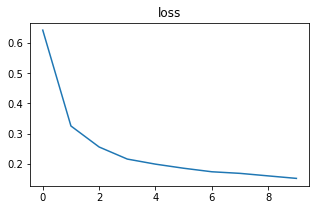

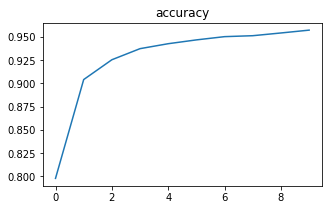

In [6]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy');